In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import tensorflow as tf
%matplotlib inline

In [ ]:
df=pd.read_csv('./titanic.csv',usecols=['Age','Fare','Survived'])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [ ]:
# df.isnull().mean() For % of null values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

### Random Sample Imputation

In [ ]:
df['Age'].dropna().sample() #dropna to avoid null values in the returned sample random value

847    35.0
Name: Age, dtype: float64

In [ ]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
# type(random_sample)
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
random_sample.index=df[df['Age'].isnull()].index
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
    df[feature+"_random"]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

In [ ]:
median=df['Age'].median()
median

28.0

In [ ]:
impute_nan(df,"Age",median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


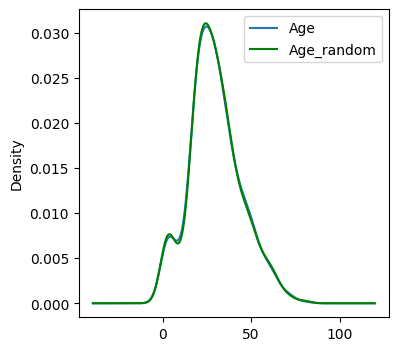

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
# df['Age_median'].plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

### Capture NaN values with new feature

In [ ]:
df=pd.read_csv('./titanic.csv',usecols=['Age','Fare','Survived'])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [ ]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(3)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0


In [ ]:
median=df['Age'].median()
median

28.0

In [ ]:
df['Age'].fillna(median,inplace=True) ## Capturing positions of NaN values then imputate with any method
df.isnull().sum()

Survived    0
Age         0
Fare        0
Age_NAN     0
dtype: int64

In [ ]:
df.head(6)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


### End of Distribution Imputation

In [ ]:
df=pd.read_csv('./titanic.csv',usecols=['Age','Fare','Survived'])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


<Axes: xlabel='Age', ylabel='Count'>

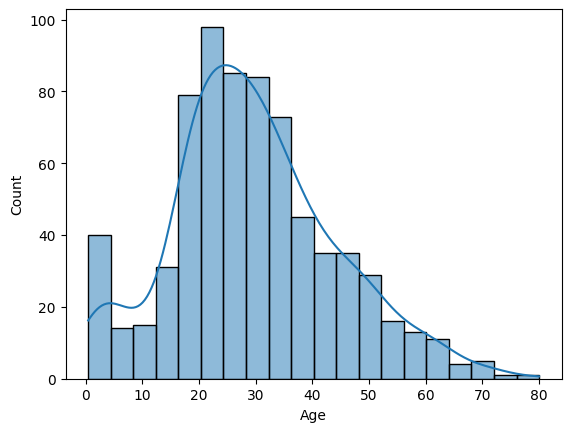

In [ ]:
sns.histplot(data = df['Age'], kde = True)

In [ ]:
extreme=df['Age'].mean()+3*df['Age'].std()
extreme

73.27860964406094

<Axes: ylabel='Age'>

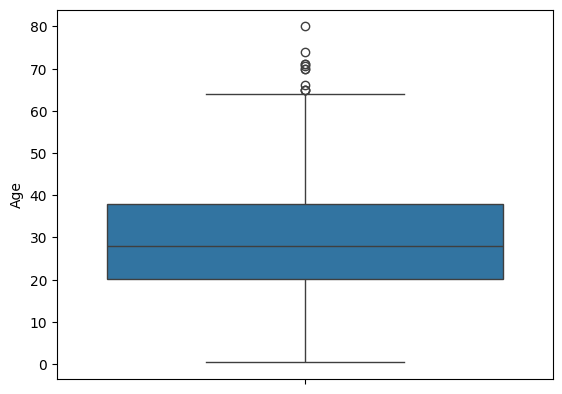

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
def impute_nan(df,feature,median,extreme):
  df[feature+' Median']=df[feature].fillna(median)
  df[feature +"_end_distribution"]=df[feature].fillna(extreme)

In [ ]:
impute_nan(df,'Age',df['Age'].median(),extreme)
df.head(3)

,Survived,Age,Fare,AgeMedian,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0


In [ ]:
df.isnull().sum()

Survived                  0
Age                     177
Fare                      0
AgeMedian                 0
Age_end_distribution      0
dtype: int64

<Axes: xlabel='AgeMedian', ylabel='Count'>

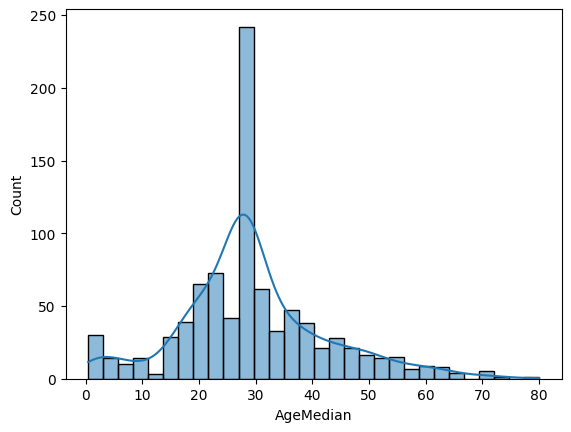

In [ ]:
sns.histplot(data = df['AgeMedian'], kde = True)

<Axes: xlabel='Age_end_distribution', ylabel='Count'>

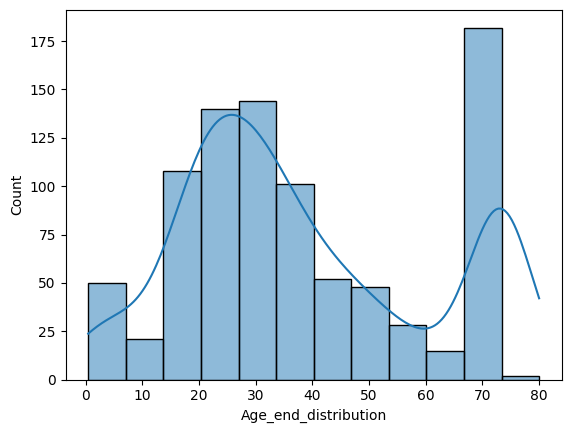

In [ ]:
sns.histplot(data = df['Age_end_distribution'], kde = True)

### Arbitrary Value Imputation (Rarely Used)

In [2]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [3]:
def impute_nan(df,variable): ## Arbitrary value should be rarely occuring, so we can capture importance of the NaN values
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [4]:
impute_nan(df,'Age')
df.head(3)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0


<Axes: xlabel='Age_zero', ylabel='Count'>

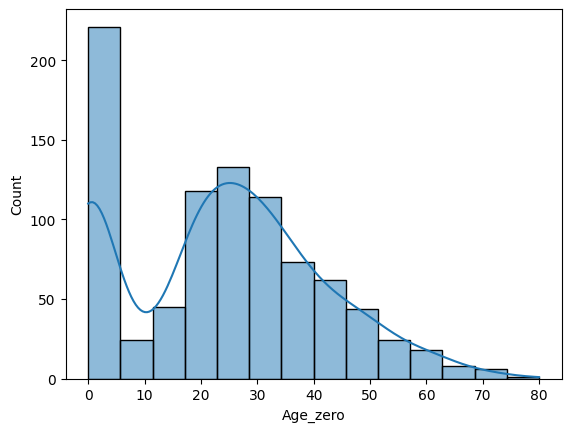

In [5]:
sns.histplot(data = df['Age_zero'], kde = True)

<Axes: xlabel='Age_hundred', ylabel='Count'>

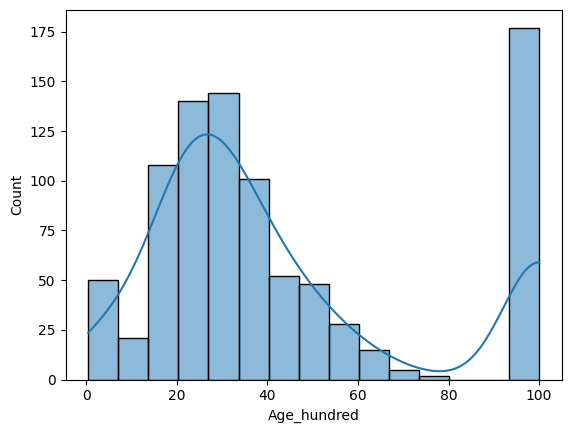

In [6]:
sns.histplot(data = df['Age_hundred'], kde = True)